In this post, I will use Boston Housing data set, the data set contains information about the housing values in suburbs of Boston.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns


In [2]:
#from sklearn.datasets import load_boston
#boston = load_boston()

In [3]:
from sklearn.datasets import load_boston
boston = datasets.load_boston()
print(boston['data'][0])


[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]


/Users/mihiragshikar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


### Check the definition of the Dataset

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.data[0].size

13

In [7]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Features Names for the Boston Dataset

In [8]:
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target, columns = ['price'])
print(df_x)
print(boston['target'])
print(df_y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [9]:
df_x.shape

(506, 13)

In [10]:
df_y.shape

(506, 1)

We see that we have 506 observations and 13 attributes. The goal is to predict the price of the house using the features given. 

In [11]:
df_x.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [12]:
df_y.dtypes

price    float64
dtype: object

In [13]:
df_x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [14]:
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Feature name

In [15]:
print(df_x.columns)
print(df_x['CRIM'])

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64


convert df_bos.data into pandas data frame

In [16]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


13


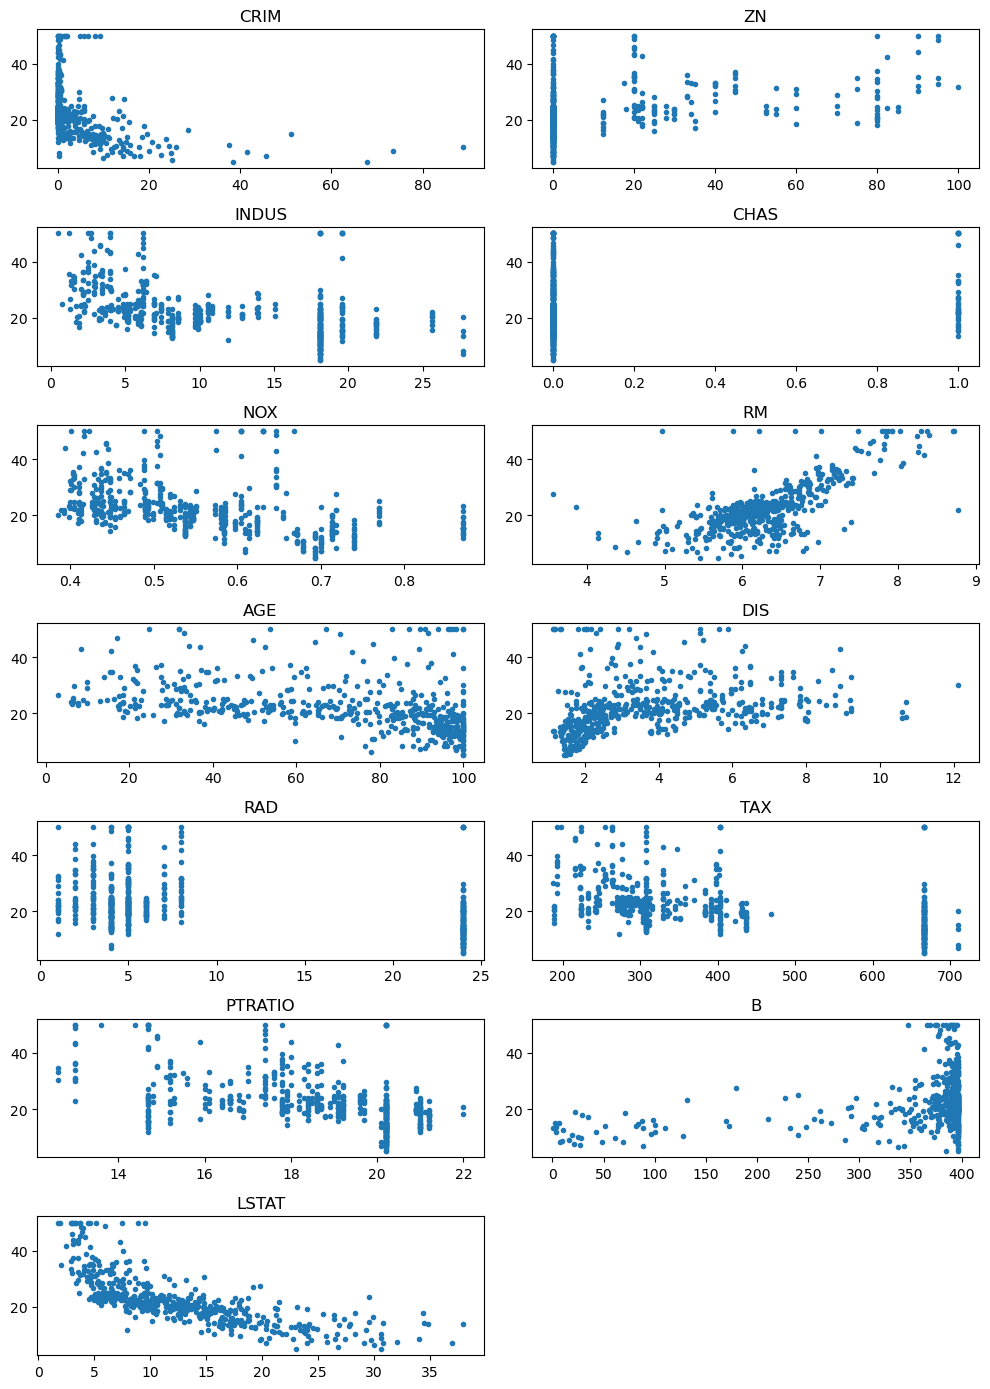

In [17]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(df_x[col],df_y,marker='.',linestyle='none')
        plt.title(col)   
        plt.tight_layout()
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
plotFeatures(colnames,"Relationship bw %s and price")

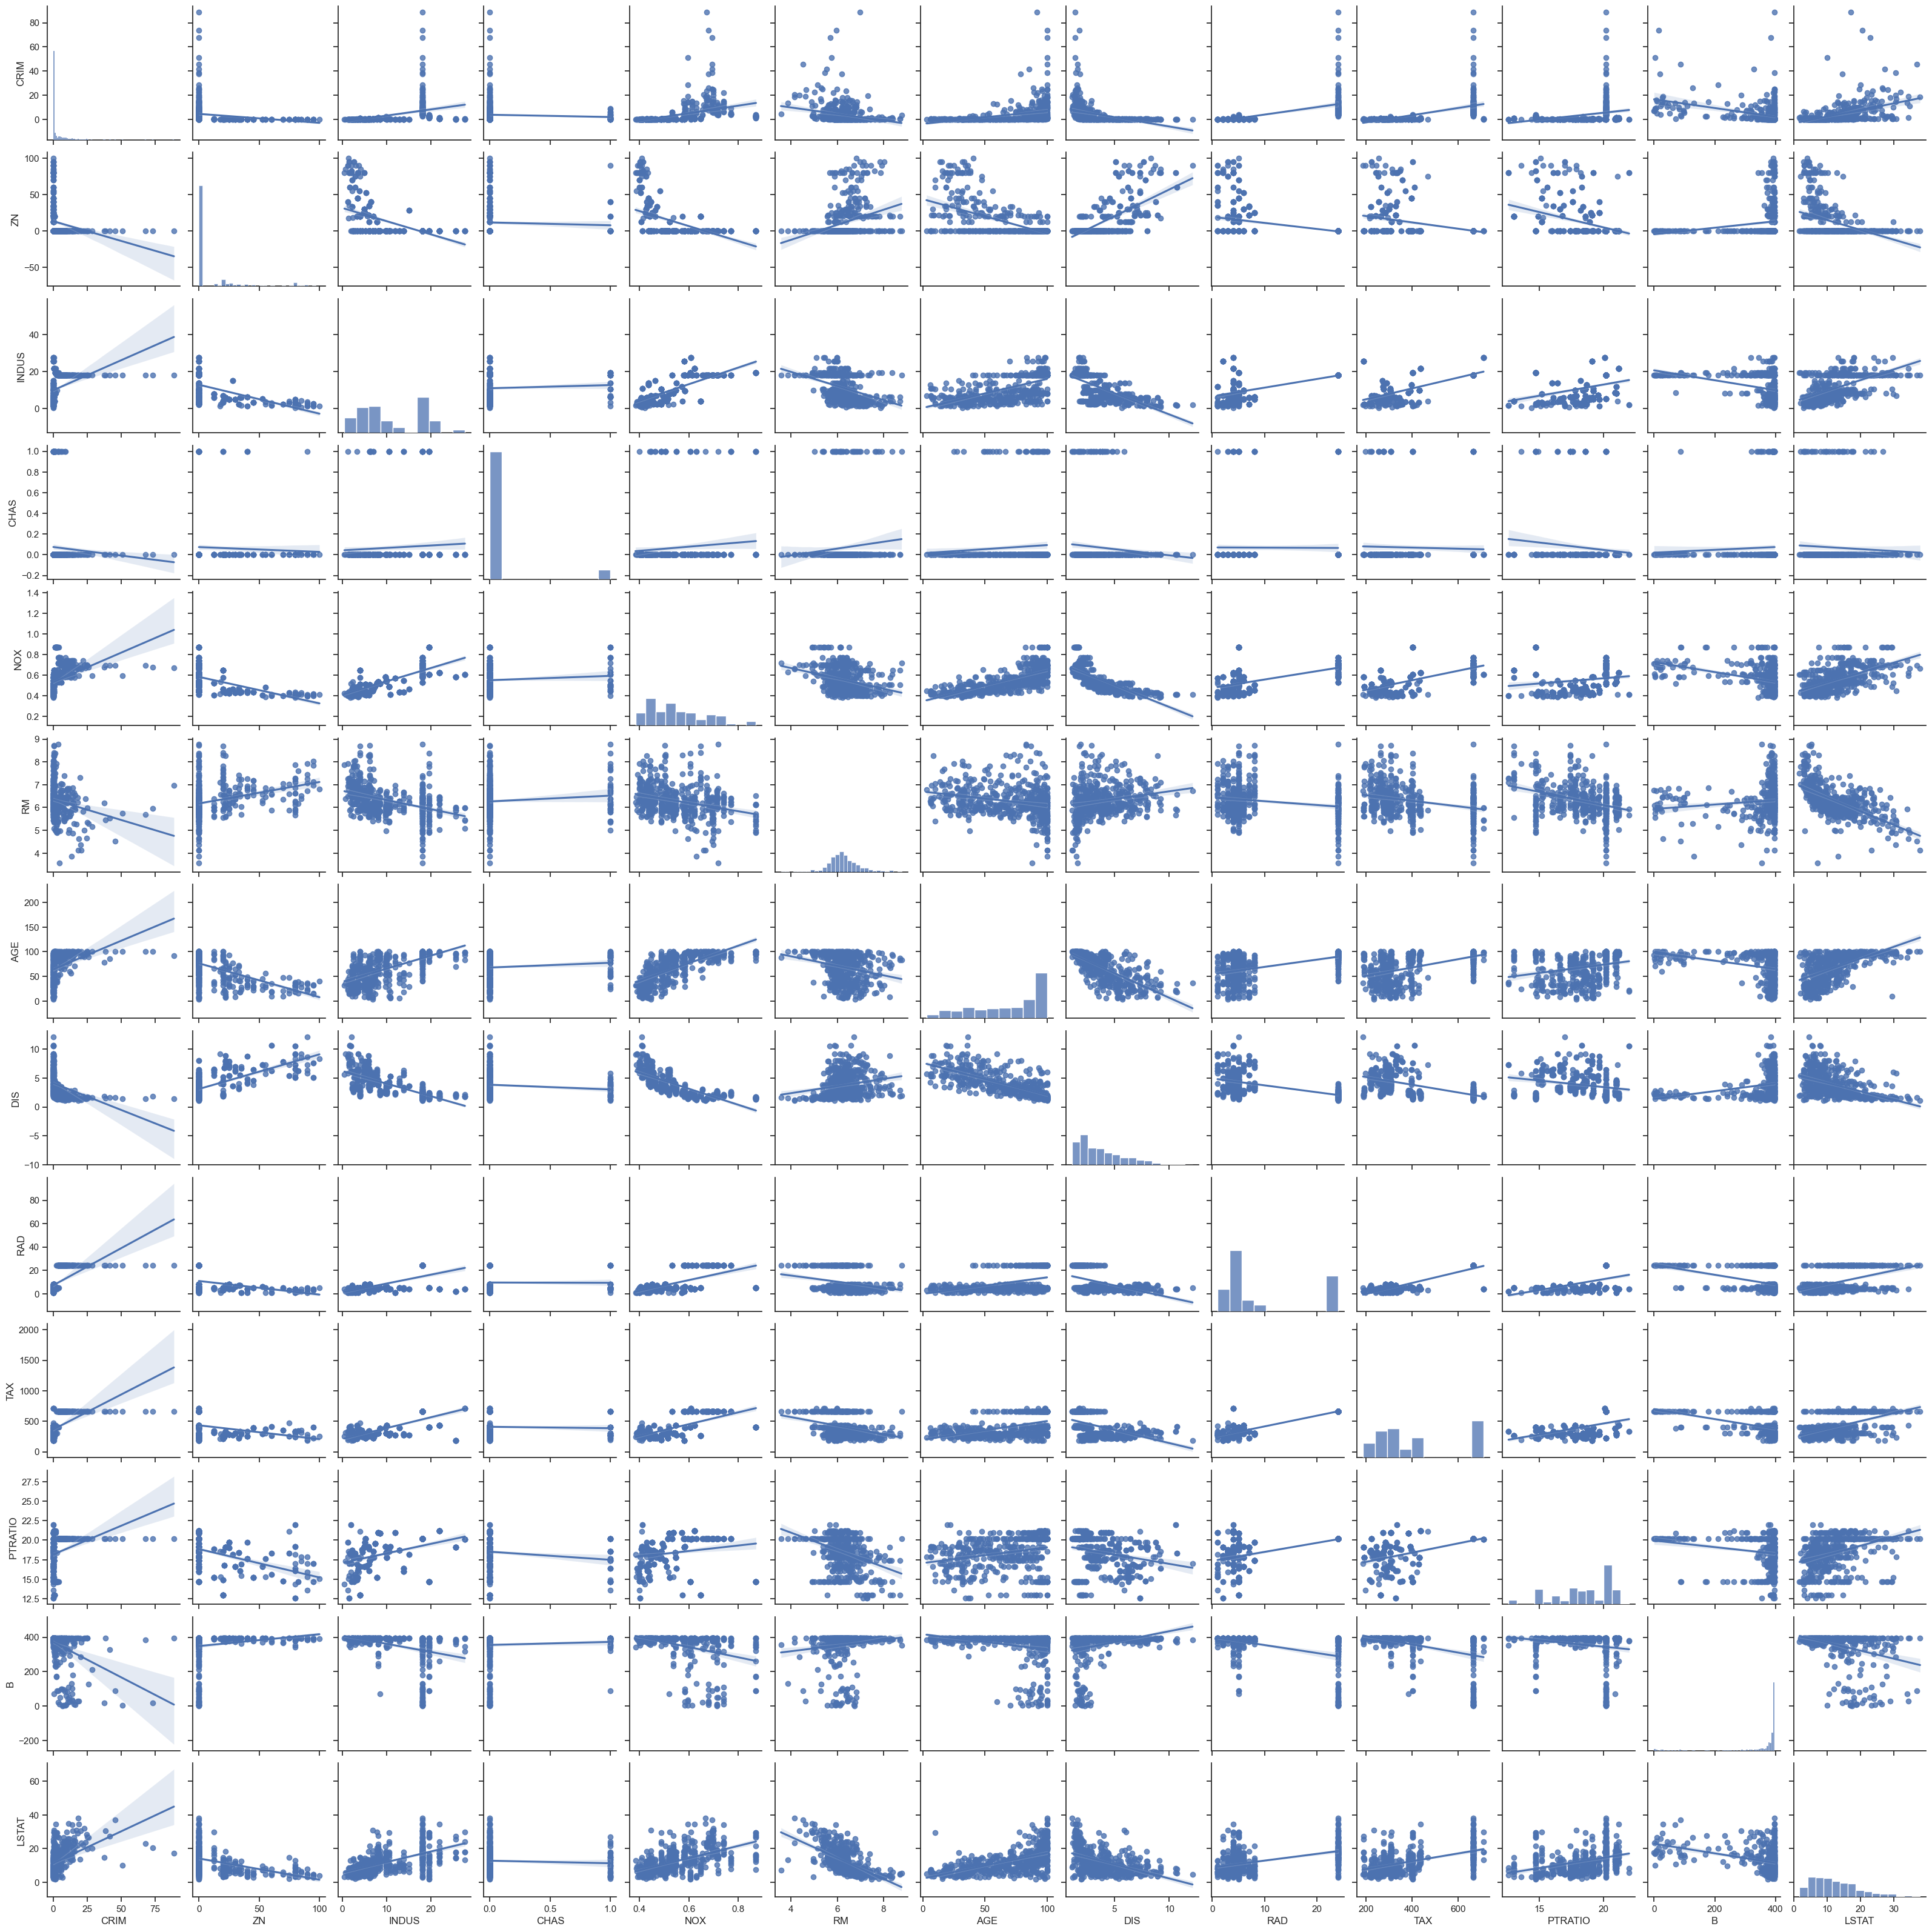

In [18]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_x,kind="reg");

These graphs gives a clear intuition of relationship of target variable with features. We can see that RM(Avg. rooms per dwelling) has very linear relationship with price.

Another option to see the relationship is to plot the correlation of features and target variable with each other using heatmap of seaborn.This is much more descriptive also.

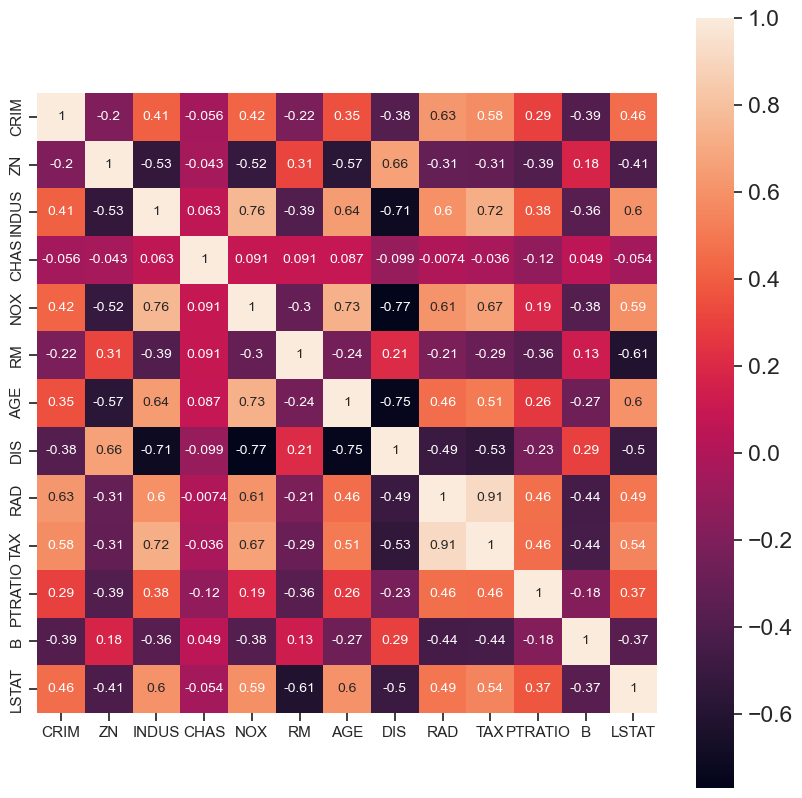

In [19]:
import seaborn as sns
fig = plt.subplots (figsize = (10,10))
sns.set (font_scale = 1.5)
sns.heatmap (df_x.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 10})
plt.show ()


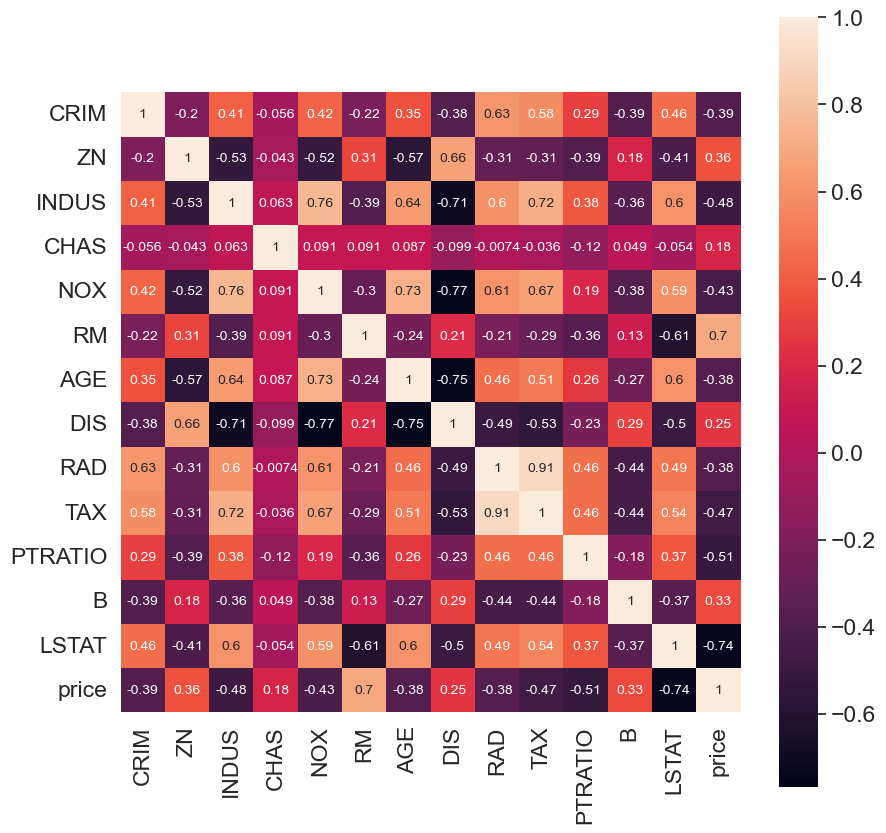

In [20]:
df = pd.concat([df_x, df_y],axis = 1,sort = True)
fig = plt.subplots (figsize = (10,10))
sns.set (font_scale = 1.5)
sns.heatmap (df.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 10})
plt.show ()

In [21]:
df.corr()
print(df[df.columns[:]])

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  price  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [22]:
#df[df.columns[:]].corr()['price'][:].abs().sort_values(ascending=False)
df[df.columns[:]].corr()['price'][:].sort_values(ascending=False)

price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: price, dtype: float64

### Features Selection. Basis of selection initially is to drop all features where corelation is less than .4
The features dropped based on weak correlation are RAD, AGE, ZN, B, DIS, CHAS

In [23]:
df_sub= df.drop(['RAD','AGE','ZN','B', 'DIS','CHAS'], axis =1)

In [24]:
df_sub.shape

(506, 8)

In [25]:
df_sub.head()

,CRIM,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,price
0,0.00632,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,222.0,18.7,5.33,36.2


In [26]:
X = df_sub.drop('price', axis =1)

In [27]:
X.shape

(506, 7)

In [28]:
y = df_sub['price']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

/Users/mihiragshikar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


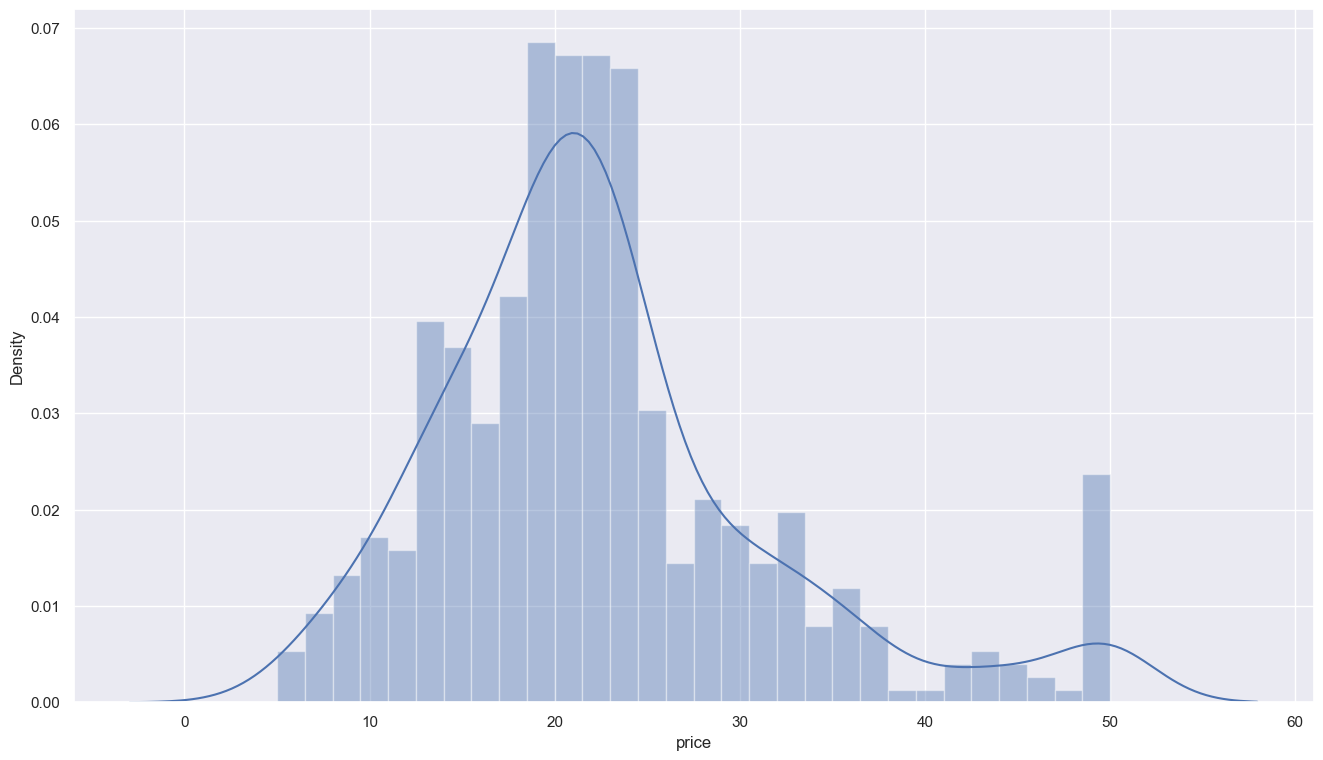

In [29]:
sns.set(rc={'figure.figsize':(16,9)})
sns.distplot(df['price'], bins=30)
plt.show()

In [30]:
np.mean(df['price'])

22.532806324110698

### Taking log of target field to make it near to normal distribution

/Users/mihiragshikar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


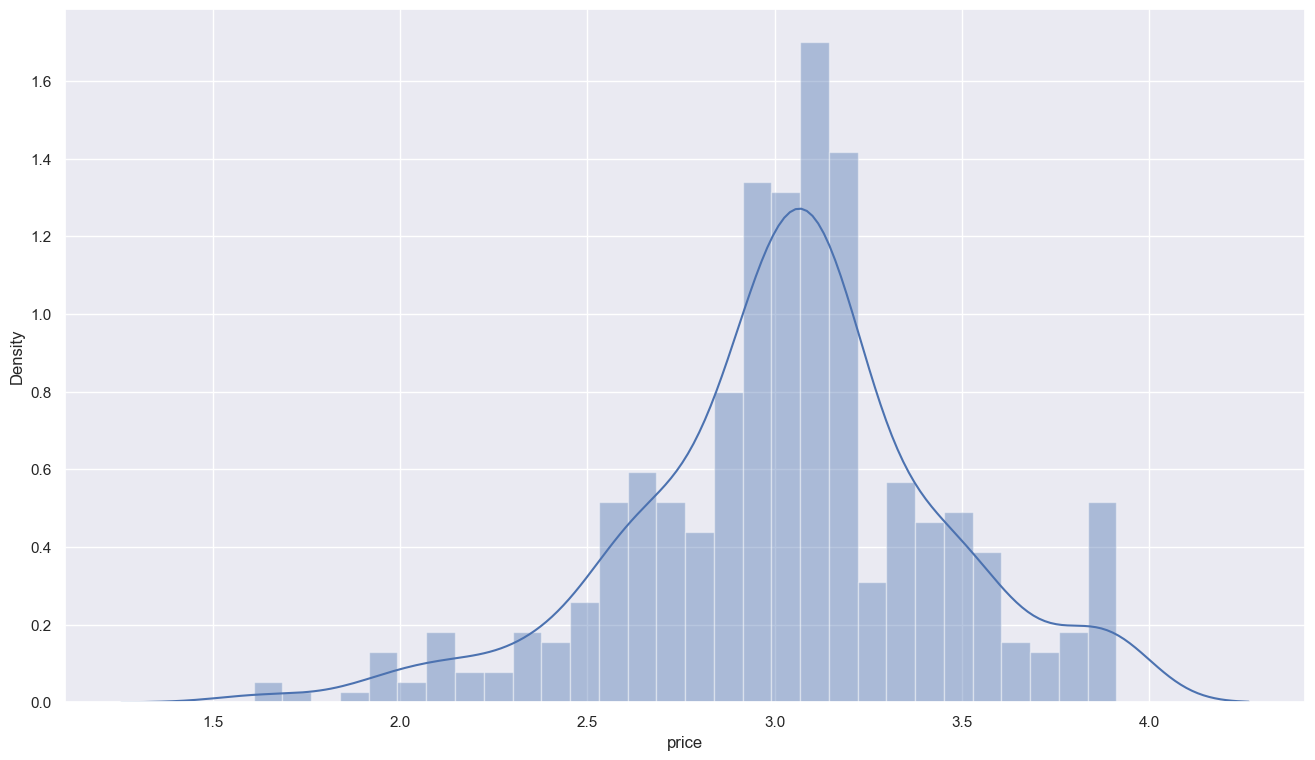

In [31]:
sns.set(rc={'figure.figsize':(16,9)})
sns.distplot(np.log(df['price']), bins=30)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [33]:
X

,CRIM,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,0.00632,2.31,0.538,6.575,296.0,15.3,4.98
1,0.02731,7.07,0.469,6.421,242.0,17.8,9.14
2,0.02729,7.07,0.469,7.185,242.0,17.8,4.03
3,0.03237,2.18,0.458,6.998,222.0,18.7,2.94
4,0.06905,2.18,0.458,7.147,222.0,18.7,5.33
...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,273.0,21.0,9.67
502,0.04527,11.93,0.573,6.120,273.0,21.0,9.08
503,0.06076,11.93,0.573,6.976,273.0,21.0,5.64
504,0.10959,11.93,0.573,6.794,273.0,21.0,6.48


In [34]:
from sklearn.linear_model import LinearRegression  
linear_model = LinearRegression()  
linear_model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Intercept
print(linear_model.intercept_)

[35.55487454]


In [36]:
# The coefficients
print('Coefficients: \n', linear_model.coef_)


Coefficients: 
 [[-1.15966452e-01  4.71249231e-02  8.25980146e-03  3.23404531e+00
  -1.66865890e+01  3.88410651e+00 -1.08974442e-02 -1.54129540e+00
   2.93208309e-01 -1.34059383e-02 -9.06296429e-01  8.80823439e-03
  -4.57723846e-01]]


In [37]:
y_pred = linear_model.predict(X_test)

In [38]:
# Explained variance score: 1 is perfect  R^2  
print('Variance Score: %0.2f' % linear_model.score(X_train, y_train))

Variance Score: 0.74


In [39]:
# Adjusted R^2 
adjusted_r_squared = 1 - (1-linear_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjusted_r_squared

0.7329085693717183

In [40]:
from sklearn import metrics  
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error: ',  metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:',  np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


##pd.DataFrame(zip(X.columns, linear_model.coef_), columns = ['features', 'estimatedCoefficients'])

Mean Absolute Error: 3.3677909837965707
Mean Squared Error:  25.419587126821934
Root Mean Squared Error: 5.041784121402059


In [41]:
linear_model.coef_[0].tolist()

[-0.11596645190829923,
 0.04712492313362869,
 0.008259801462502178,
 3.234045310301048,
 -16.68658901913361,
 3.884106514652037,
 -0.01089744422871862,
 -1.5412954044120128,
 0.2932083087544819,
 -0.013405938287264961,
 -0.9062964291148589,
 0.008808234386811845,
 -0.457723845821397]

In [42]:
#To get the list of column names
names = [i for i in list(df_x)]
names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [43]:
pd.DataFrame(list((zip(names, linear_model.coef_[0].tolist()))), columns = ['names', 'Coefficients'])

,names,Coefficients
0,CRIM,-0.115966
1,ZN,0.047125
2,INDUS,0.008260
3,CHAS,3.234045
4,NOX,-16.686589
5,RM,3.884107
6,AGE,-0.010897
7,DIS,-1.541295
8,RAD,0.293208
9,TAX,-0.013406


As you can see from the data frame that there is a high correlation between RM and prices. Lets plot a scatter plot between True housing prices and True RM.

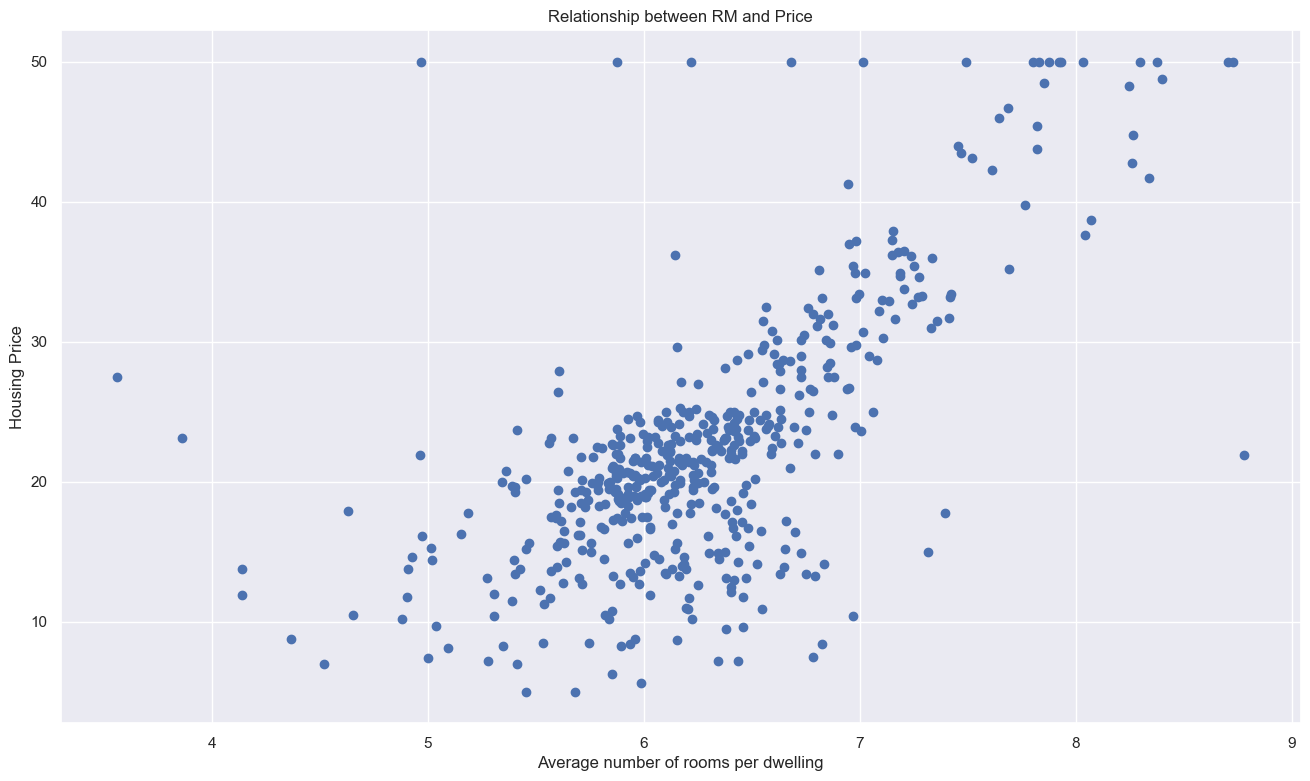

In [44]:
plt.scatter(df_x.RM, df_y)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title('Relationship between RM and Price')
plt.show()

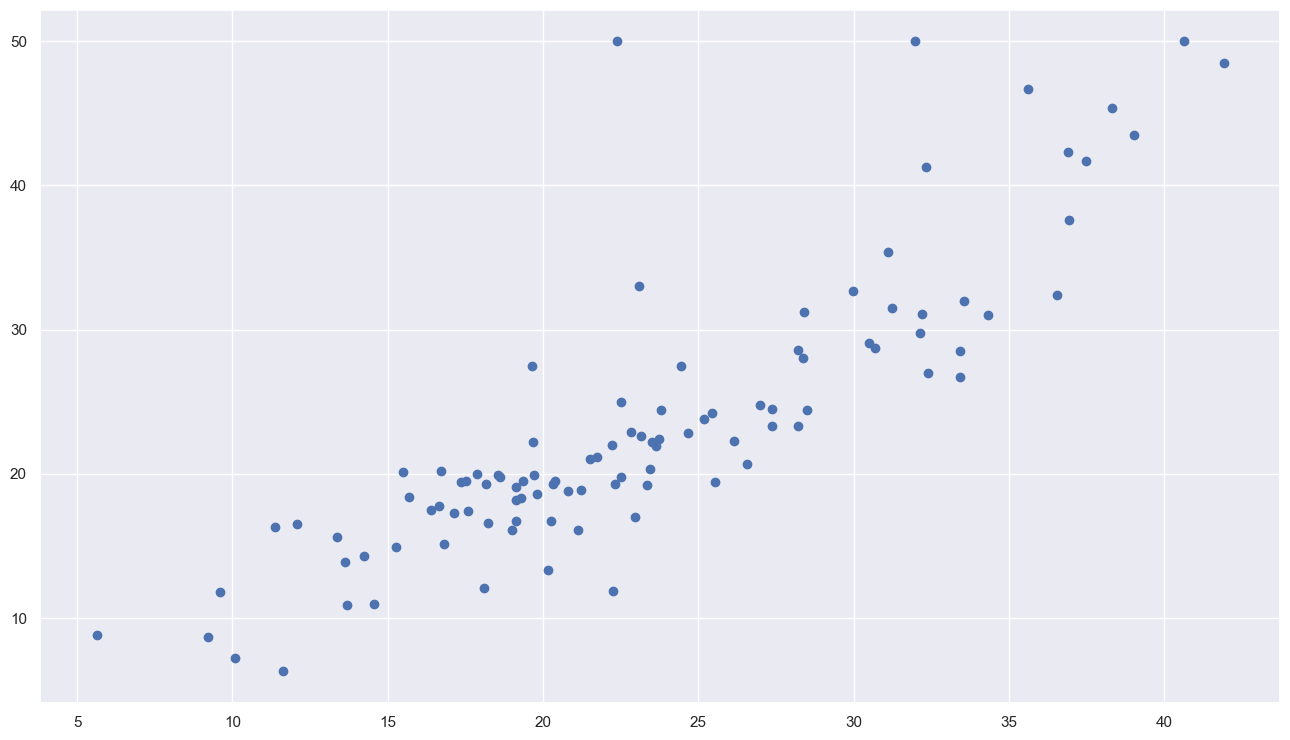

In [45]:
# plot of predicted and test 

plt.scatter(y_pred, y_test)

#### Residual Plots
Residual plots are a good way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero. If you see structure in your data, that means your model is not capturing some thing. Maye be there is a interaction between 2 variables that you are not considering, or may be you are measuring time dependent data. If you get some structure in your data, you should go back to your model and check whether you are doing a good job with your parameters.


Text(0.5, 0, 'Fitted values')

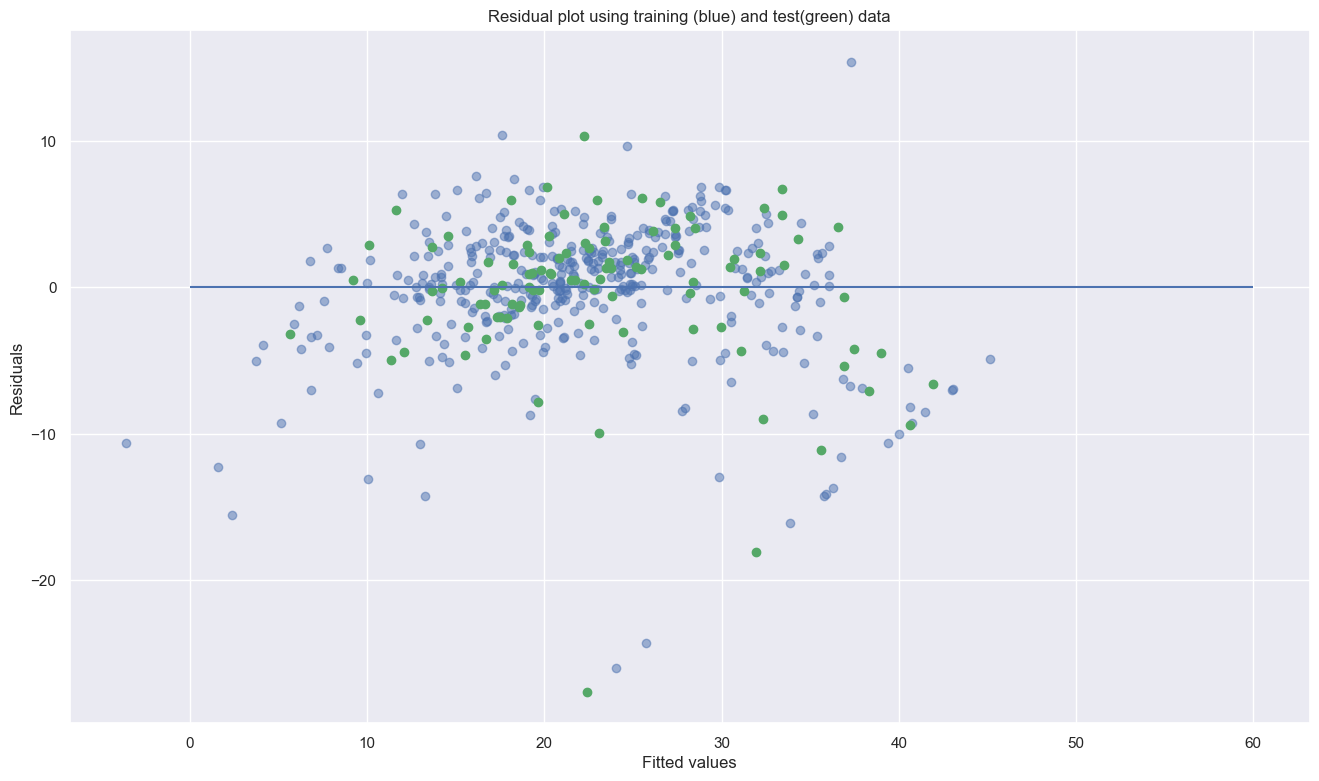

In [46]:
plt.scatter(linear_model.predict(X_train), linear_model.predict(X_train)-y_train, c= 'b', alpha = 0.5)
plt.scatter(linear_model.predict(X_test), linear_model.predict(X_test)-y_test, c= 'g')
plt.hlines(y = 0, xmin = 0, xmax = 60)
plt.title('Residual plot using training (blue) and test(green) data')
plt.ylabel('Residuals')
plt.xlabel('Fitted values')

In [47]:
## Finding p-values using statmodels

Xs = X_train.values
y = y_train.values

In [48]:
import statsmodels.api as sm 
X2 = sm.add_constant(Xs)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     86.07
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          7.71e-106
Time:                        14:06:18   Log-Likelihood:                -1190.1
No. Observations:                 404   AIC:                             2408.
Df Residuals:                     390   BIC:                             2464.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5549      5.499      6.466      0.0

In [49]:
print("R-Squared:", est2.rsquared, " Adj R-Squared: ", est2.rsquared_adj)

R-Squared: 0.7415244219726307  Adj R-Squared:  0.7329085693717183


In [50]:
est2.pvalues

array([3.02067131e-10, 1.87977592e-03, 2.68369566e-03, 9.05866935e-01,
       1.48930074e-03, 6.84768922e-05, 3.29864989e-16, 4.60212101e-01,
       2.47004383e-11, 7.94179397e-05, 1.62938009e-03, 8.40888662e-10,
       3.35019278e-03, 7.34277577e-15])

In [51]:
# Compute R^2 and adjusted R^2 with formulas 
yhat = linear_model.predict(X_train)
SS_Residual = sum((np.asarray(y_train)-yhat)**2)
SS_Total = sum(((np.asarray(y_train))-np.mean(np.asarray(y_train)))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)


[0.74152442] [0.73290857]
